## Importing Libraries


In [ ]:
import matplotlib
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

## Mounting Google Drive for extracting Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from PIL import Image as pil_image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras import backend as K
import tensorflow as tft

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

## Generating/Normalizing Image

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [ ]:
image_shape=(150, 150, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Using Sequential model 

In [ ]:
model = Sequential()


## Trying Out with different Filters


In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

## Flattening out the Image

In [ ]:
model.add(Flatten())

## Trying out different Activations with Varying Densities

In [ ]:
model.add(Dense(128))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.5))
#Dropout is one of the important concept in the machine learning. 
#It is used to fix the over-fitting issue. Input data may have some of the unwanted data,
# usually called as Noise. Dropout will try to remove the noise data and thus prevent the model from over-fitting. 

In [ ]:

model.add(Dense(1))
model.add(Activation('sigmoid'))
# This function takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive), 
# the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.

In [ ]:

model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
model.save_weights('model1.h5')

## Summary of our model

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
batch_size=5

## Importing train test images in Binary class mode

In [ ]:
train_image_gen=image_gen.flow_from_directory('/content/gdrive/My Drive/teeth_dataset/teeth_dataset/Trianing',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
test_image_gen=image_gen.flow_from_directory('/content/gdrive/My Drive/teeth_dataset/teeth_dataset/test',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')


Found 14 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices


{'caries': 0, 'without_caries': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Training the model with 75 epochs and 10 steps per epoch

In [ ]:
results = model.fit_generator(train_image_gen,
                              epochs= 75,
                             steps_per_epoch=10,
                             validation_data=test_image_gen,
                             validation_steps=12)


# here loss means: how our model is doing, number of errors while training the data, the lesser the better
# and accuracy refers to:  the ratio between the correct predictions and total predictions. The higher the better

Epoch 1/75
10/10 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.7400

10/10 [==============================] - 25s 2s/step - loss: 0.6888 - accuracy: 0.7400 - val_loss: 0.6332 - val_accuracy: 0.7143
Epoch 2/75
10/10 [==============================] - 3s 361ms/step - loss: 0.6083 - accuracy: 0.7800
Epoch 3/75
10/10 [==============================] - 2s 171ms/step - loss: 0.6066 - accuracy: 0.8200
Epoch 4/75
10/10 [==============================] - 2s 173ms/step - loss: 0.6074 - accuracy: 0.7400
Epoch 5/75
10/10 [==============================] - 2s 235ms/step - loss: 0.7555 - accuracy: 0.7000
Epoch 6/75
10/10 [==============================] - 4s 356ms/step - loss: 0.5694 - accuracy: 0.7200
Epoch 7/75
10/10 [==============================] - 3s 245ms/step - loss: 0.4798 - accuracy: 0.8000
Epoch 8/75
10/10 [==============================] - 2s 172ms/step - loss: 0.5424 - accuracy: 0.7800
Epoch 9/75
10/10 [==============================] - 2s 169ms/step - loss: 0.8917 - accuracy: 0.7400
Epoch 10/75
10/10 [==============================] - 2s 167ms/step - lo

In [ ]:
model.save("/content/gdrive/MyDrive/CNN_Model")

In [ ]:
!pwd

/content


## Got accuracy of 0.85 or 85%

In [ ]:
%matplotlib inline

## Predicting if its healthy or not, by then if the predict>0.5, its healthy else its not 

In [ ]:
# from keras.preprocessing import image
import keras.utils as image
import numpy as np
def get_res(path):
    raw_img = image.load_img(path, target_size=(150, 150))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255
    predict = model.predict(raw_img)
    print(type(raw_img))
    print(raw_img.shape)
    plt.imshow(cv2.imread(path))
    if predict >= 0.5:
        text = "Healthy tooth"
    elif 0.25 <= predict <= 0.45:
        text = "Mild Cavity"
    else:
        text = "Cavity infected tooth"
    plt.show()
    print(text)

## Giving the path and testing on random image

1/1 [==============================] - 0s 243ms/step
<class 'numpy.ndarray'>
(1, 150, 150, 3)


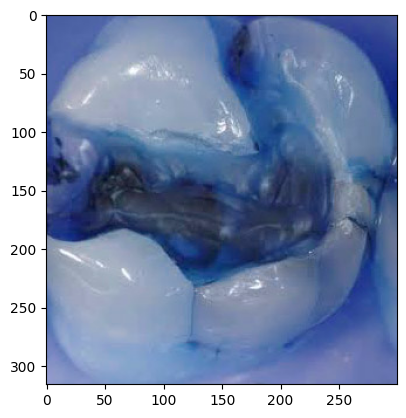

Mild Cavity


In [ ]:
path='/content/gdrive/My Drive/teeth_dataset/teeth_dataset/test/caries/wc45.jpg'
get_res(path)